In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/prasertcbs/basic-dataset/raw/master/usedcars_with_missing_values.csv")

In [3]:
df['year'] = df['year'].astype('category')

In [4]:
df

,year,model,price,mileage,color,transmission
0,2011,NaN,21992.0,7413.0,Yellow,AUTO
1,2011,SEL,20995.0,10926.0,Gray,AUTO
2,2011,SEL,19995.0,7351.0,Silver,AUTO
3,2011,SEL,17809.0,11613.0,Gray,AUTO
4,2012,SE,17500.0,8367.0,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200.0,95000.0,Silver,AUTO
146,2002,SE,5995.0,87003.0,Red,AUTO
147,2000,SE,5980.0,96841.0,Red,AUTO
148,2001,SE,4899.0,151479.0,Yellow,AUTO


## Clean data

In [5]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

In [6]:
df_dummy = pd.get_dummies(df)
df_dummy = df_dummy.dropna()
df_dummy = df_dummy.reset_index(drop = True)

In [7]:
outcomename = 'price'
X = df_dummy.drop(columns = outcomename)
Y = df_dummy[outcomename]

In [8]:
class create_model:
    def __init__(self, model_name, test_size, X, Y, n_splits=5):
        self.model_name = model_name
        self.test_size = test_size
        self.X = X
        self.Y = Y
        self.n_splits = n_splits
    
    def model(self):
        kf = KFold(n_splits = self.n_splits, shuffle = True)
        scores = []
        for train_index, test_index in kf.split(self.X):
            self.X_train, self.X_test = self.X.values[train_index], self.X.values[test_index]
            self.Y_train, self.Y_test = self.Y.values[train_index], self.Y.values[test_index]
            self.model_name.fit(self.X_train, self.Y_train)
            scores.append(self.model_name.score(self.X_test, self.Y_test))
        self.mean_score = sum(scores) / self.n_splits
        return self.model_name
    
    def score(self):
        self.Y_pred = self.model_name.predict(self.X)
        self.r2 = r2_score(self.Y, self.Y_pred)
        self.Y_predict = self.model_name.predict(self.X_test)
        self.rmse = math.sqrt(mean_squared_error(self.Y_test, self.Y_predict))
        # print("Mean K-fold R^2 score:", self.mean_score)
        # print("Overall R^2 score:", self.r2)
        # return(self.mean_score, self.r2)

In [9]:
linear_model = create_model(LinearRegression(), 0.1, X, Y, n_splits=5)

In [10]:
def mean_score(num: int, model: str):
    for num in range(num):
        model.model()
        model.score()
        yield model.mean_score, model.r2, model.rmse

In [11]:
linear_yield = mean_score(100, linear_model)

In [12]:
df_linear = pd.DataFrame(linear_yield)
df_linear.columns = ['Mean_K-fold_R^2_score', 'Overall_R^2_score', 'root_mean_squared_error']

In [13]:
df_linear.head()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
0,0.697259,0.846415,1823.126865
1,0.661704,0.852697,1598.705934
2,0.652421,0.856292,1851.237314
3,0.727194,0.869877,1276.295160
4,0.627551,0.870177,1176.142860


In [14]:
df_linear.describe()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
count,100.000000,100.000000,100.000000
mean,0.685436,0.847105,1690.979791
std,0.033115,0.017591,313.744029
min,0.610635,0.758763,840.956287
25%,0.660981,0.838291,1443.681849
50%,0.689274,0.848692,1723.134839
75%,0.711545,0.859067,1865.881364
max,0.754414,0.871203,2807.615530


The Overall R^2 score is slightly higher than the Mean K-fold R^2 score, suggested that the model is performing well on the test set as well as on the training set. It indicates that the model has learned to generalize well to new data, which is a desirable quality in a model.

In [15]:
# def hist_kfold_r2score(kfold, r2score, w):
#     fig, axs = plt.subplots(1, 2, tight_layout=True)

#     axs[0].hist(kfold, edgecolor='black', bins=np.arange(min(kfold), max(kfold) + w, w))
#     axs[0].set_xlabel('Mean K-fold R^2 score')
#     axs[0].set_ylabel('Frequency')
#     axs[0].set_xlim([0, 1])

#     axs[1].hist(r2score, edgecolor='black', bins=np.arange(min(r2score), max(r2score) + w, w))
#     axs[1].set_xlabel('Overall R^2 score')
#     axs[1].set_ylabel('Frequency')
#     axs[1].set_xlim([0, 1])

In [16]:
def hist_data(data, w, range):
    # fig = plt.plots(1, 2, tight_layout=True)


    plt.hist(data, edgecolor='black', bins=np.arange(min(data), max(data) + w, w))
    plt.xlabel('Mean K-fold R^2 score')
    plt.ylabel('Frequency')
    plt.xlim(range)

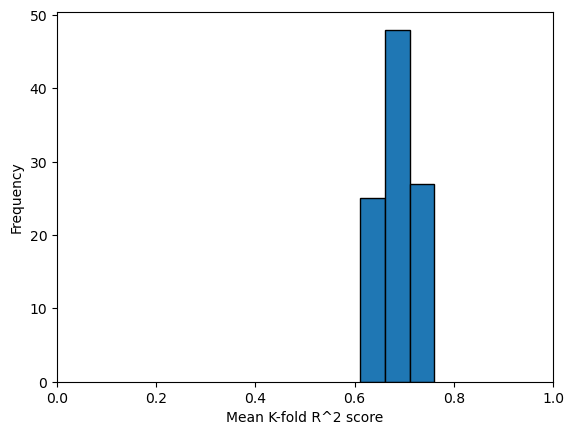

In [17]:
kfold = df_linear['Mean_K-fold_R^2_score']
hist_data(kfold, 0.05, [0, 1])

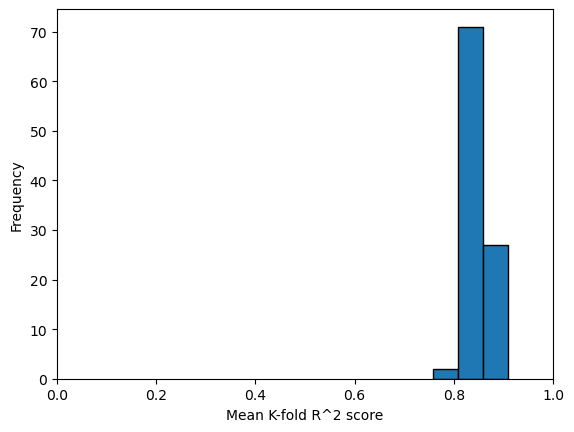

In [18]:
r2score = df_linear['Overall_R^2_score']
hist_data(r2score, 0.05, [0, 1])

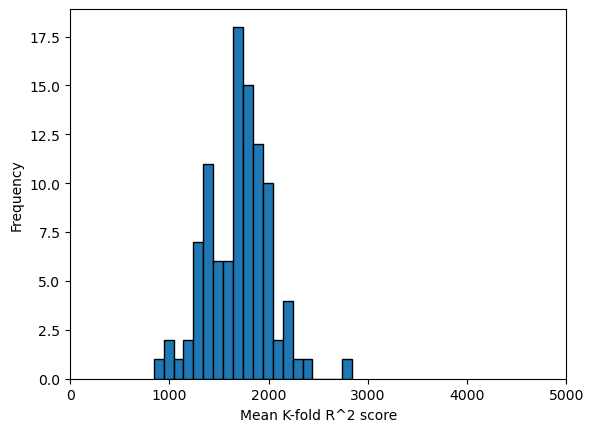

In [19]:
root_mean_squared_error = df_linear['root_mean_squared_error']
hist_data(root_mean_squared_error, 100, [0, 5000])

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
decision_tree_model = create_model(DecisionTreeRegressor(), 0.1, X, Y, n_splits=5)
tree_yield = mean_score(100, decision_tree_model)
df_tree = pd.DataFrame(tree_yield)
df_tree.columns = ['Mean_K-fold_R^2_score', 'Overall_R^2_score', 'root_mean_squared_error']

In [25]:
df_tree.head()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
0,0.412359,0.894523,2290.115491
1,0.468751,0.905171,2171.448776
2,0.514770,0.937210,1766.948611
3,0.460847,0.835903,2856.460266
4,0.368438,0.872382,2519.038351


In [26]:
df_tree.describe()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
count,100.000000,100.000000,100.000000
mean,0.489565,0.910958,2076.861844
std,0.063026,0.029057,339.462960
min,0.286752,0.818218,1335.813075
25%,0.450055,0.892280,1848.607705
50%,0.493900,0.914767,2058.645303
75%,0.534345,0.931272,2314.334108
max,0.616899,0.964113,3006.443485


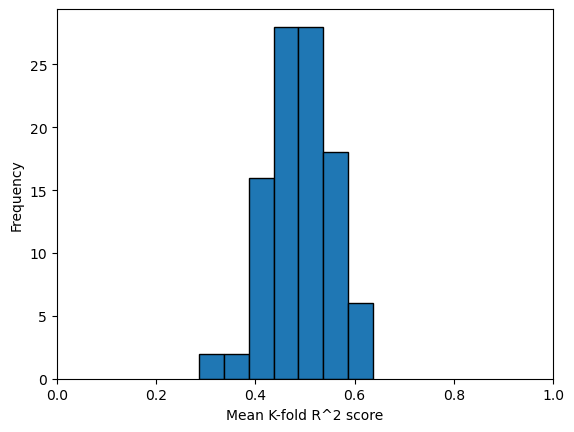

In [28]:
kfold = df_tree['Mean_K-fold_R^2_score']
hist_data(kfold, 0.05, [0, 1])

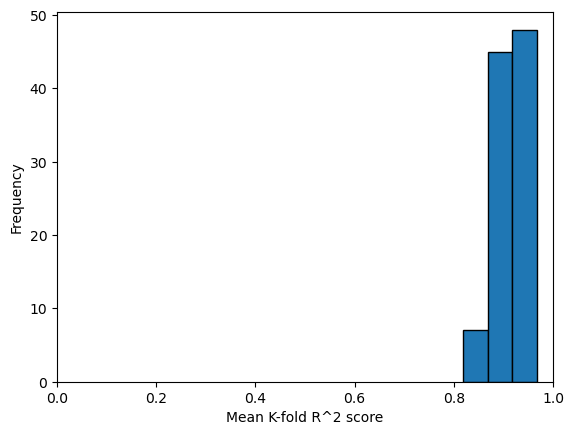

In [29]:
r2score = df_tree['Overall_R^2_score']
hist_data(r2score, 0.05, [0, 1])

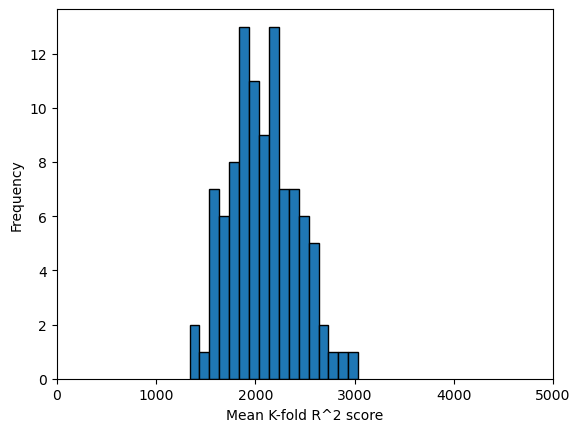

In [32]:
root_mean_squared_error = df_tree['root_mean_squared_error']
hist_data(root_mean_squared_error, 100, [0, 5000])

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
forest_model = create_model(RandomForestRegressor(), 0.1, X, Y, n_splits=5)
forest_yield = mean_score(100, forest_model)
df_forest = pd.DataFrame(forest_yield)
df_forest.columns = ['Mean_K-fold_R^2_score', 'Overall_R^2_score', 'root_mean_squared_error']

In [36]:
df_forest.head()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
0,0.716934,0.927986,1446.711303
1,0.713633,0.921724,1430.322099
2,0.624853,0.910765,1673.082111
3,0.655276,0.922303,1499.150158
4,0.646933,0.917160,1520.088721


In [37]:
df_forest.describe()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
count,100.000000,100.000000,100.000000
mean,0.686941,0.911408,1651.005196
std,0.035389,0.015061,257.226566
min,0.581141,0.873656,1126.632752
25%,0.664690,0.901231,1471.310936
50%,0.691495,0.913365,1637.713402
75%,0.713439,0.923302,1836.610487
max,0.748468,0.938646,2231.723459


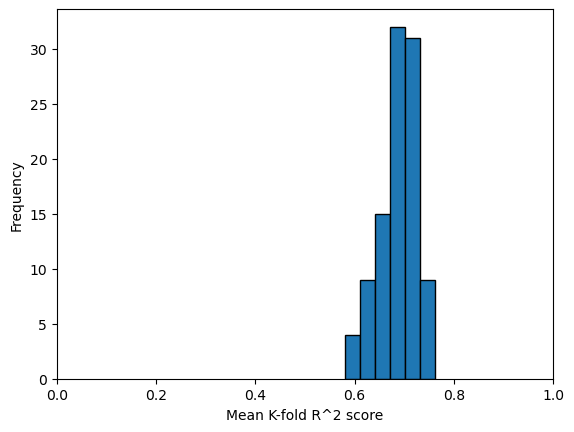

In [39]:
kfold = df_forest['Mean_K-fold_R^2_score']
r2score = df_forest['Overall_R^2_score']
hist_data(kfold, 0.03, [0, 1])

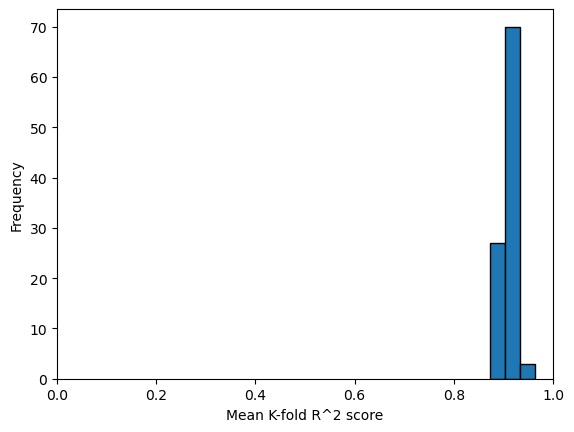

In [40]:
r2score = df_forest['Overall_R^2_score']
hist_data(r2score, 0.03, [0, 1])

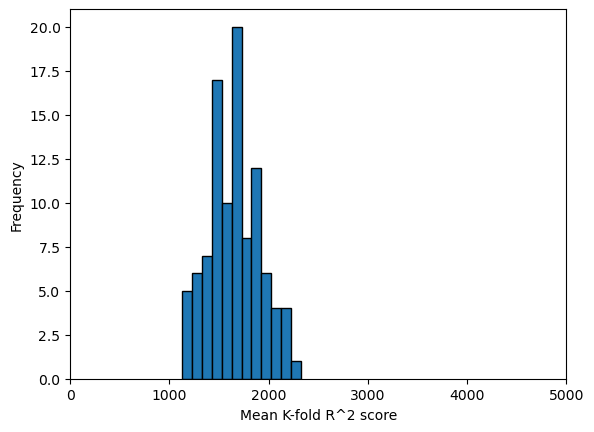

In [42]:
root_mean_squared_error = df_forest['root_mean_squared_error']
hist_data(root_mean_squared_error, 100, [0, 5000])

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
xg_model = create_model(GradientBoostingRegressor(), 0.1, X, Y, n_splits = 5)
xg_yield = mean_score(500, xg_model)
df_xg = pd.DataFrame(xg_yield)
df_xg.columns = ['Mean_K-fold_R^2_score', 'Overall_R^2_score', 'root_mean_squared_error']

In [54]:
df_xg.head()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
0,0.637991,0.904762,1823.430608
1,0.649671,0.910849,1781.083485
2,0.609642,0.931704,1513.975711
3,0.655192,0.903228,1940.454702
4,0.727009,0.869181,2315.962247


In [55]:
df_xg.describe()

,Mean_K-fold_R^2_score,Overall_R^2_score,root_mean_squared_error
count,500.000000,500.000000,500.000000
mean,0.685094,0.916839,1680.302543
std,0.033176,0.018745,284.005852
min,0.562530,0.842718,1029.247445
25%,0.661433,0.905537,1470.722982
50%,0.689477,0.918770,1675.590421
75%,0.709242,0.932026,1868.049849
max,0.759947,0.950825,2590.976942


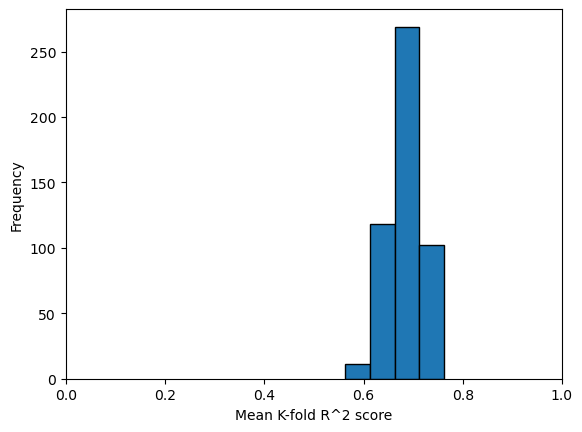

In [56]:
kfold = df_xg['Mean_K-fold_R^2_score']
hist_data(kfold, 0.05, [0, 1])

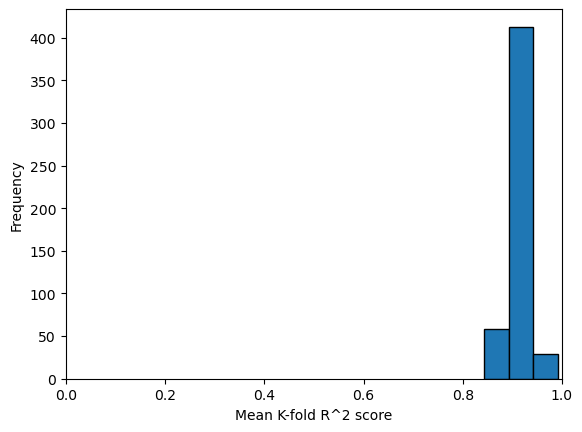

In [57]:
r2score = df_xg['Overall_R^2_score']
hist_data(r2score, 0.05, [0, 1])

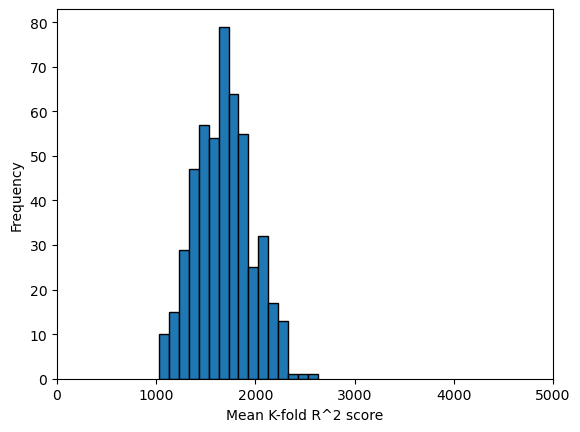

In [58]:
root_mean_squared_error = df_xg['root_mean_squared_error']
hist_data(root_mean_squared_error, 100, [0, 5000])